# Homework 2 (HW2)

---

By the end of this homework we expect you to be able to:

1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

## Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library,
   you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you
   don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you
   implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
   (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a
   single notebook (plus the required data files) in the _master/main_ branch. If there are multiple notebooks present,
   we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results
   contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells.
   Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at _Piccardi Music,_ a promising new music label created by a mysterious Italian disc jockey "_Signor Piccardi_". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column             | Description                                                                                                                                                                                                                       |
| ------------------ | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `artist`           | The name of the artist who created the album being reviewed.                                                                                                                                                                      |
| `album`            | The name of the album being reviewed.                                                                                                                                                                                             |
| `recordlabel`      | The name of the record label(s) who published the album.                                                                                                                                                                          |
| `releaseyear`      | The year that the album was released.                                                                                                                                                                                             |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0.                                                                                                                                                           |
| `reviewauthor`     | The name of the author who reviewed the album.                                                                                                                                                                                    |
| `genre`            | The genre assigned to the album by Pitchfork.                                                                                                                                                                                     |
| `reviewdate`       | The date that the review was published.                                                                                                                                                                                           |
| `key`              | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on)                                                                                       |
| `acousticness`     | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic.                                                                                                   |
| `danceability`     | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.                                       |
| `energy`           | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy.                                                                                                    |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals.                                                                                                   |
| `liveness`         | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live.                                                                                                     |
| `loudness`         | The overall loudness of the album in decibels (dB).                                                                                                                                                                               |
| `speechiness`      | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence`          | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds.                                                                                     |
| `tempo`            | The overall estimated tempo of an album in beats per minute (BPM).                                                                                                                                                                |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.


In [1]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import math
import matplotlib.pyplot as plt
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# displaying markdown strings
from IPython.display import display, Markdown, Latex


## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to _Signor Piccardi_ (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by _Piccardi Music_.


**Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

4. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with _found data_—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](<https://en.wikipedia.org/wiki/Pitchfork_(website)>), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected.

---


In [2]:
# 1.1
# Load data and remove duplicates reviews
dataframe = pd.read_csv("data/pitchfork.csv.gz", compression="gzip")
dataframe.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


In [3]:
# Remove duplicate rows and keep the first according to the subset ['artist','album']
# Even though different reviewers might have reviewed the same album more than once we only keep the first row for simplicity (see Zulip)

# Examples of such rows
duplicated = dataframe[
    dataframe.duplicated(subset=["album", "reviewauthor", "artist"], keep=False)
]
duplicated.head(4)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
10,American Football,American Football,Ian Cohen,8.6,1999.0,May 21 2014,Polyvinyl,Rock,0.482778,0.681889,5.222222,-9.121778,0.031889,0.272561,0.361657,0.141989,0.282889,123.864000
11,American Football,American Football,Ian Cohen,7.7,2016.0,October 26 2016,Polyvinyl,Rock,0.482778,0.681889,5.222222,-9.121778,0.031889,0.272561,0.361657,0.141989,0.282889,123.864000
91,Crystal Castles,Crystal Castles,Ian Cohen,7.8,2008.0,March 17 2008,Last Gang,Electronic,0.630529,0.730353,4.294118,-7.089176,0.052694,0.116483,0.258783,0.200553,0.569471,123.956529
92,Crystal Castles,Crystal Castles,Ian Cohen,8.5,2010.0,April 29 2010,Fiction,Electronic,0.630529,0.730353,4.294118,-7.089176,0.052694,0.116483,0.258783,0.200553,0.569471,123.956529


In [4]:
# Drop the right duplicates
df = dataframe.drop_duplicates(subset=["album", "artist"])
print(
    f"Number of entries :\n{len(dataframe)} (before dropping duplicates) vs {len(df)} (after dropping duplicates)."
)

Number of entries :
16785 (before dropping duplicates) vs 16738 (after dropping duplicates).


Text(0.5, 1.0, 'Distribution of album release across the years')

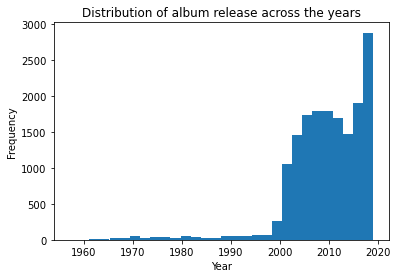

In [5]:
# 1.2 a)
# Plot distribution of release years
df["releaseyear"].plot(kind="hist", bins=30)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of album release across the years")

Text(0.5, 1.0, 'Average score of albums per year')

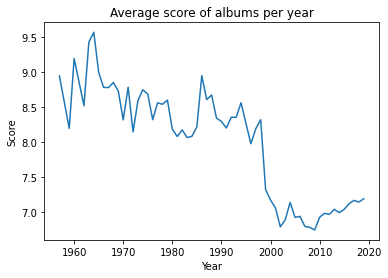

In [6]:
# 1.2 b)
# Plot average score of albums per year
df_groupedyear = df.groupby("releaseyear")
df_groupedyear["score"].mean().plot(
    kind="line"
)  # group reviews per year and take mean of score
plt.xlabel("Year")
plt.ylabel("Score")
plt.title("Average score of albums per year")


In [7]:
# 1.3
# Basic statistics of numerical columns

# There are few rows with incorrect values (< 0 or =-1.0) in most columns -> we drop them (by filtering w.r.t. one column)
df = df.drop(df[df["danceability"] == -1.0].index)
df = df.drop(df[df["speechiness"] < 0].index)
print(f"Number of rows after cleaning: %d" % len(df.index))

df.describe().loc[["mean", "50%", "min", "max"]]


Number of rows after cleaning: 16730


,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mean,7.048536,2009.345965,0.512967,0.601951,5.219034,-9.286912,0.091208,0.302476,0.275303,0.196910,0.405853,120.377216
50%,7.300000,2010.000000,0.511364,0.624823,5.230769,-8.446428,0.056681,0.229000,0.149641,0.174304,0.406300,120.406490
min,0.000000,1957.000000,0.038667,0.000126,0.000000,-51.728750,0.008644,0.000001,0.000000,0.015300,0.000010,23.983333
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


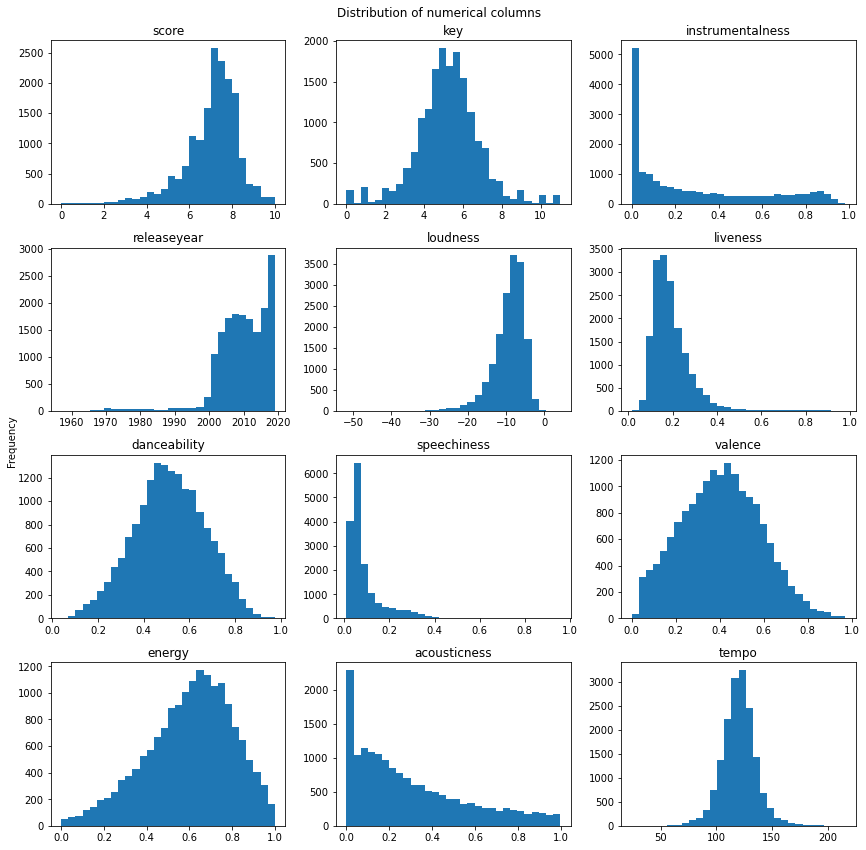

In [8]:
# 1.3
# Plot their distributions

fig, ax = plt.subplots(4, 3, figsize=(12, 12), sharey=False, sharex=False)

numeric_col = [
    "score",
    "releaseyear",
    "danceability",
    "energy",
    "key",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]

for i, col in enumerate(numeric_col):
    sbplt = ax[i % 4, math.floor(i / 4)]
    sbplt.hist(df[col].values, bins=30)
    sbplt.set_title(col)

# fig.text(0.5,0, "Value")
fig.text(0, 0.45, "Frequency", rotation=90)
# fig.delaxes(ax[3][2]) in case releaseyear is removed
fig.suptitle("Distribution of numerical columns")
fig.tight_layout()


In [9]:
# 1.4

# Categorical columns
categ_col = [
    "artist",
    "album",
    "recordlabel",
    "reviewauthor",
    "genre",
]  # key releaseyear ????????????????????????

# Replace none and NaN in "genre" to Other
df["genre"].replace("none", "Other", inplace=True)
df["genre"].fillna("Other", inplace=True)

for col in categ_col:
    print(f"Number of different values in column %s: %d" % (col, len(df[col].unique())))
    if len(df[col].unique()) <= 10:
        print(f"Values in column %s:" % col)
        print(df[col].unique())


Number of different values in column artist: 7890
Number of different values in column album: 16176
Number of different values in column recordlabel: 3030
Number of different values in column reviewauthor: 554
Number of different values in column genre: 10
Values in column genre:
['Electronic' 'Folk/Country' 'Rock' 'Rap' 'Global' 'Experimental' 'Metal'
 'Pop/R&B' 'Jazz' 'Other']


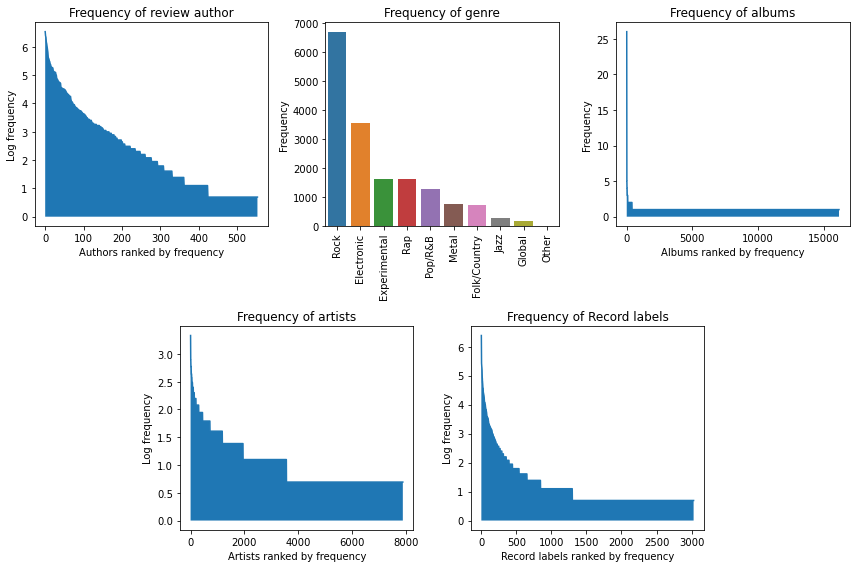

In [10]:
# Extra: count occurrence of categorical variables

fig = plt.figure()
fig.set_size_inches((12, 8))

ax1 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 6), (0, 2), colspan=2)
ax3 = plt.subplot2grid((2, 6), (0, 4), colspan=2)
ax4 = plt.subplot2grid((2, 6), (1, 1), colspan=2)
ax5 = plt.subplot2grid((2, 6), (1, 3), colspan=2)

# Review author
df_ra = df["reviewauthor"].value_counts().apply(lambda x: np.log(x + 1))
sns.lineplot(ax=ax1, x=range(0, df_ra.shape[0]), y=df_ra)
ax1.fill_between(range(0, df_ra.shape[0]), df_ra)
ax1.set_xlabel("Authors ranked by frequency")
ax1.set_ylabel("Log frequency")
ax1.set_title("Frequency of review author")

# Genre
df_genre = df["genre"].value_counts()
ax2.set_ylabel("Frequency")
sns.barplot(ax=ax2, x=df_genre.index, y=df_genre)
ax2.tick_params(axis="x", rotation=90)
ax2.set_ylabel("Frequency")
ax2.set_title("Frequency of genre")

# Album
df_album = df["album"].value_counts()
sns.lineplot(ax=ax3, x=range(0, df_album.shape[0]), y=df_album)
ax3.fill_between(range(0, df_album.shape[0]), df_album)
ax3.set_xlabel("Albums ranked by frequency")
ax3.set_ylabel("Frequency")
ax3.set_title("Frequency of albums")

# Artist
df_artist = df["artist"].value_counts().apply(lambda x: np.log(x + 1))
sns.lineplot(ax=ax4, x=range(0, df_artist.shape[0]), y=df_artist)
ax4.fill_between(range(0, df_artist.shape[0]), df_artist)
ax4.set_xlabel("Artists ranked by frequency")
ax4.set_ylabel("Log frequency")
ax4.set_title("Frequency of artists")

# Record label
df_rl = df["recordlabel"].value_counts().apply(lambda x: np.log(x + 1))
sns.lineplot(ax=ax5, x=range(0, df_rl.shape[0]), y=df_rl)
ax5.fill_between(range(0, df_rl.shape[0]), df_rl)
ax5.set_xlabel("Record labels ranked by frequency")
ax5.set_ylabel("Log frequency")
ax5.set_title("Frequency of Record labels")

fig.tight_layout()


### 1.5

TODO: DEVELOPP MORE

- We see an extreme sqewness in some variables such as reviewauthor, and slight
  skewness in which genres are more represented. This may be an issue clearly
  because the tastes of a particular reviewer may largely influence the trend of
  which albums are "good". The sqewness of genre may indicate that the pitchfork autors
  have a preference for a certain kind of music which will cause scores to
  be different from what their "true" score might be. So for example, we may
  conclude that we should publish a rock album whereas an R&B might be more
  popular in the mainstream nowadays.
  The same kind of issues appear when we take the skewness of artists and record labels into account. Since it is the reviewers that choose which artists and record labels they decide to review, we may find that a certain kind of music is over-represented and biased due to the reviewer's preferences.
- We see that an overwhelmingly large number of reviews are for albums came out
  after 2000. At the same time, we see that albums that came out before 2000 have
  a better score on average. It might be possible that a small group of "old
  timers" are giving generous scores for old albums.
- ...


#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0.

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---


In [11]:
# 2.1
# All unique genres
genres = df["genre"].unique()
# get_dummies convert categorical values to an indicator variable
onehot_cols = pd.get_dummies(df["genre"])
for genre in genres:
    new_col = genre + "_onehot"
    df[new_col] = onehot_cols[genre]
df.head()


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot,Folk/Country_onehot,Rock_onehot,Rap_onehot,Global_onehot,Experimental_onehot,Metal_onehot,Pop/R&B_onehot,Jazz_onehot,Other_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,...,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,...,0,1,0,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,...,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,...,0,0,1,0,0,0,0,0,0,0
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,...,0,0,0,1,0,0,0,0,0,0


In [12]:
# 2.2

"""def numpy_helper(df, cols):
    arr = np.empty((len(df.shape),len(cols)))
    for i, c in enumerate(cols) :
            arr[:,i] = df[c]
    return arr"""


'def numpy_helper(df, cols):\n    arr = np.empty((len(df.shape),len(cols)))\n    for i, c in enumerate(cols) :\n            arr[:,i] = df[c]\n    return arr'

In [13]:
def numpy_helper(data, cols):
    arr = np.empty((len(data), len(cols)))
    for i, row in enumerate(data):
        arr[i, :] = row[1][cols].values[0]
    return arr


In [14]:
# 2.3

# Retrieving the 'onehot' column names
cols = [c for c in df.columns.values if "onehot" in c]

# Some albums from different artists have the same name, so we also group according to the artist
df_albums = df.groupby(["album", "artist"])
print(df_albums.head(10))
print(f"Number of different albums : {len(df_albums)}")


                      artist                              album  \
0                   Studio 1                           Studio 1   
1                 John Fahey  The Great Santa Barbara Oil Slick   
2             Reigning Sound                    Too Much Guitar   
3             The Red Thread                     After the Last   
4                 Mac Miller                           Swimming   
...                      ...                                ...   
16772           Flying Lotus                           Flamagra   
16773                     YG                        4REAL 4REAL   
16774          Mavis Staples                          We Get By   
16775  Amyl and the Sniffers              Amyl and the Sniffers   
16778              D√¢m-Funk                         STFU II EP   

                  reviewauthor  score  releaseyear        reviewdate  \
0               Andy Battaglia    8.5       2009.0  February 18 2009   
1              Mark Richardson    8.2       2005.0 

In [15]:
"""
X, y = [], []

for name, group in df_albums :
    X.append(numpy_helper(group,cols)[0])
    y.append(group.iloc[0].at['score'])

"""

"""X = np.empty((0,len(cols)))
y = np.empty((0))

for name, group in df_albums :
    X = np.append(X,np.array([numpy_helper(group,cols)[0]]),axis=0)
    y = np.append(y,group.iloc[0].at['score'])"""

X = numpy_helper(df_albums, cols)
y = numpy_helper(df_albums, ["score"])


In [16]:
# Split train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)


In [17]:
# 2.4

# Use the sklearn linear regressor as a comparison before computing our own regressor
lin_reg = LinearRegression().fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)

# VERY BAD PREDICTION => PROBLEM ? (probably because the model is way too simple just using the genre of the album)
print(f"R2-score : {round(r2,2)}")


R2-score : 0.01


In [18]:
# Linear regressor

# Add a column of 1's to X_train
B_train = np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)

a = B_train.T @ B_train
b = B_train.T @ y_train
w = np.linalg.solve(a, b)

print(f"Regression coefficients:\n {w}")
# They look crazy but they work


Regression coefficients:
 [[-23.66099395]
 [ 30.60584219]
 [ 30.95210506]
 [ 30.65029261]
 [ 30.6197596 ]
 [ 31.04389993]
 [ 31.03736079]
 [ 30.73887499]
 [ 30.65179217]
 [ 31.3816836 ]
 [ 30.99432728]]


In [19]:
B_test = np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1)
y_pred = B_test @ w
print(f"A few predicted scores:\n {y_pred[:10]}")


A few predicted scores:
 [[6.98929866]
 [6.98929866]
 [6.94484824]
 [6.95876565]
 [6.98929866]
 [6.98929866]
 [7.72068966]
 [7.07788104]
 [6.98929866]
 [7.07788104]]


In [20]:
# 2.5

# Not doing any good here
r2_linreg = r2_score(y_test, y_pred)
print(f"R2-score : {round(r2_linreg,2)}")


R2-score : 0.01


### 2.6

TODO


**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear", "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns. Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set.

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---


In [21]:
# 3.1

cols_3 = cols + [
    "releaseyear",
    "key",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "valence",
    "tempo",
]

X_3 = numpy_helper(df_albums, cols_3)
y_3 = numpy_helper(df_albums, ["score"])


In [22]:
# Split train/test
from sklearn.model_selection import train_test_split

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, y_3, test_size=0.3, random_state=123
)


In [23]:
# Linear regression using sklearn
reg_3 = LinearRegression().fit(X_train_3, y_train_3)

y_pred_3 = reg_3.predict(X_test_3)

r_score_3 = r2_score(y_test_3, y_pred_3)

print(f"R2-score : {round(r_score_3,2)}")


R2-score : 0.03


In [24]:
# 3.2

# Alternate train/test split
df_train = df[df["releaseyear"] < 2000.0]
df_test = df[df["releaseyear"] >= 2003.0]
df_alb_train = df_train.groupby(["album", "artist"])
df_alb_test = df_test.groupby(["album", "artist"])

X_train_alt = numpy_helper(df_alb_train, cols_3)
y_train_alt = numpy_helper(df_alb_train, ["score"])
X_test_alt = numpy_helper(df_alb_test, cols_3)
y_test_alt = numpy_helper(df_alb_test, ["score"])


In [25]:
# Linear regression using sklearn
reg_alt = LinearRegression().fit(X_train_alt, y_train_alt)

y_pred_alt = reg_alt.predict(X_test_alt)

r_score_alt = r2_score(y_test_alt, y_pred_alt)

print(f"R2-score : {round(r_score_alt,2)}")


R2-score : -0.28


// By the way not totally sure about this

We find a negative R2-score, the model is fit worse than if we had just done a constant prediction: (for each entry in X_test_alt) -> (average score of y_train_alt)


(array([1.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 7.000e+00, 1.000e+01,
        1.900e+01, 2.000e+01, 3.900e+01, 5.700e+01, 7.300e+01, 1.190e+02,
        1.440e+02, 1.710e+02, 2.480e+02, 3.770e+02, 4.940e+02, 7.550e+02,
        1.034e+03, 1.434e+03, 1.940e+03, 2.295e+03, 2.257e+03, 1.755e+03,
        9.100e+02, 3.750e+02, 1.500e+02, 3.200e+01, 1.700e+01, 2.000e+00]),
 array([-8.27868858, -7.9001657 , -7.52164282, -7.14311994, -6.76459705,
        -6.38607417, -6.00755129, -5.62902841, -5.25050552, -4.87198264,
        -4.49345976, -4.11493687, -3.73641399, -3.35789111, -2.97936823,
        -2.60084534, -2.22232246, -1.84379958, -1.46527669, -1.08675381,
        -0.70823093, -0.32970805,  0.04881484,  0.42733772,  0.8058606 ,
         1.18438349,  1.56290637,  1.94142925,  2.31995213,  2.69847502,
         3.0769979 ]),
 <BarContainer object of 30 artists>)

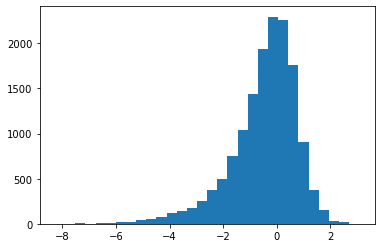

In [26]:
# 3.3

resid_base = y_test_alt - y_pred_alt
plt.hist(resid_base, bins=30)


In [27]:
n = y_pred_alt.shape[0]

base_proba = np.count_nonzero(np.abs(resid_base >= 2.0)) / n

# Bootstrap

probas = []

for i in range(0, n):
    sample = np.random.choice(np.arange(n), n)
    y_pred_sample = y_pred_alt[sample]
    y_test_sample = y_test_alt[sample]
    resid = y_test_sample - y_pred_sample

    proba = np.count_nonzero(np.abs(resid >= 2.0)) / n
    probas.append(proba)

probas = np.array(probas)
c_low, c_high = np.quantile(probas, [0.025, 0.975])

print("probability of being off by more than two points: {:.2e}".format(base_proba))
print("95% bootstrapped confidence interval: [{:.2e}, {:.2e}]".format(c_low, c_high))


probability of being off by more than two points: 2.85e-03
95% bootstrapped confidence interval: [2.03e-03, 3.73e-03]


In [28]:
# 3.4

reg = GradientBoostingRegressor().fit(X_train_alt, y_train_alt.ravel())
y_pred_gbo = reg.predict(X_test_alt)

r2_score_gbo = r2_score(y_test_alt, y_pred_gbo)
print("R2-score for GB regressor: {:.2f}".format(r2_score_gbo))


R2-score for GB regressor: -0.41


### 3.5

It's worse now ????


**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set.

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean $R^2$ along with the 90% CI for each scenario.
   - n_estimators $ \in \{ 100, 200, 300, 400\}$
   - learning_rate $ \in \{ 0.1, 0.05, 0.01\}$.

With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.

4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---


In [37]:
# 4.1

# Get bands with more than one album
has_more_than_one = df.groupby(["artist"])["album"].size() > 1
dfb = df.loc[df["artist"].apply(lambda a: has_more_than_one.loc[a])]

# Get the latest releaseyear for each band with more than one album
max_rely = dfb.groupby("artist")["releaseyear"].max()

# Keep the albums with latest release year
df_curr = dfb.loc[
    dfb[["artist", "releaseyear"]].apply(
        lambda s: max_rely.loc[s["artist"]] == s["releaseyear"], axis=1
    )
]

# For the bands that published more than one album on their latest year we
# arbitrarily choose to keep only the first one we find
dupes = df_curr.loc[df_curr.duplicated("artist", keep="first")]["album"]
df_curr = df_curr.loc[df_curr["album"].apply(lambda a: a not in dupes.values)]


# Get the previous albums
df_prev = dfb.loc[dfb["album"].apply(lambda a: a not in df_curr["album"].values)]

# Compute desired statistics
features = [
    "releaseyear",
    "key",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "valence",
    "tempo",
    "score",
]
for genre in df_genre.index:
    features.append(genre + "_onehot")

df_mean = df_prev.groupby("artist")[features].mean()

# Join the dataframes
dfb = df_curr.join(df_mean, on="artist", rsuffix="_previous")

# Print the result
print(dfb.columns)
print(f"Number of rows: %d, number of columns: %d" % (dfb.shape[0], dfb.shape[1]))

Index(['artist', 'album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate',
       'recordlabel', 'genre', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Electronic_onehot', 'Folk/Country_onehot',
       'Rock_onehot', 'Rap_onehot', 'Global_onehot', 'Experimental_onehot',
       'Metal_onehot', 'Pop/R&B_onehot', 'Jazz_onehot', 'Other_onehot',
       'releaseyear_previous', 'key_previous', 'acousticness_previous',
       'danceability_previous', 'energy_previous', 'instrumentalness_previous',
       'liveness_previous', 'loudness_previous', 'speechiness_previous',
       'valence_previous', 'tempo_previous', 'score_previous',
       'Rock_onehot_previous', 'Electronic_onehot_previous',
       'Experimental_onehot_previous', 'Rap_onehot_previous',
       'Pop/R&B_onehot_previous', 'Metal_onehot_previous',
       'Folk/Country_onehot_previous', 'Jazz_onehot_previous',
       'Global_onehot_

In [35]:
# 4.2
f = []
for feature in features:
    f.append(feature)
    f.append(feature + "_previous")
features = f
features.remove("score")
features = np.array(features)

In [38]:
X = numpy_helper(dfb.groupby(["album", "artist"]), features)
y = numpy_helper(dfb.groupby(["album", "artist"]), ["score"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [40]:
reg = GradientBoostingRegressor().fit(X_train, y_train.ravel())
y_pred = reg.predict(X_test)
r2_t42 = r2_score(y_test, y_pred)
print(f"R2 for test set: %f" % r2_t42)

R2 for test set: 0.999513


In [41]:
# 4.3
n_estimators = [100, 200, 300, 400]
learning_rates = [0.1, 0.05, 0.01]

def build_N_indices(y, N, seed=None):
    num_rows = y.shape[0]
    fold_size = math.floor(num_rows / N)
    indices = np.random.permutation(num_row)
    N_indices = [indices[k * fold_size : (k + 1) * fold_size] for k in range(N)]
    return np.array(N_indices)

def cross_validation():
    return 0

## Part 2: Second Album Syndrome

Your second project at _Piccardi Music_ is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).


**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions.
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---


In [84]:
# 5.1

df_2nd = df.copy()
# df_2nd.groupby(['artist']).count()[['album']].head()

count = df_2nd["artist"].value_counts()
art_2_alb = count[count >= 2].index.to_list()
df_2_alb = df_2nd[df_2nd["artist"].isin(art_2_alb)]

print(
    f"By printing the values of 'releaseyear' we see that there's already no rows left with an empty entry for \
that column :\n{df_2_alb['releaseyear'].value_counts().index.to_list()}"
)


By printing the values of 'releaseyear' we see that there's already no rows left with an empty entry for that column :
[2010.0, 2011.0, 2007.0, 2009.0, 2013.0, 2016.0, 2012.0, 2005.0, 2006.0, 2008.0, 2017.0, 2015.0, 2018.0, 2014.0, 2004.0, 2003.0, 2019.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1996.0, 1994.0, 1997.0, 1992.0, 1995.0, 1971.0, 1991.0, 1990.0, 1979.0, 1982.0, 1993.0, 1981.0, 1970.0, 1977.0, 1975.0, 1988.0, 1974.0, 1985.0, 1980.0, 1987.0, 1986.0, 1989.0, 1969.0, 1967.0, 1976.0, 1972.0, 1968.0, 1983.0, 1978.0, 1973.0, 1984.0, 1966.0, 1964.0, 1965.0, 1963.0, 1962.0, 1960.0, 1957.0]


In [85]:
# 5.2

df_2_alb["album_number"] = count[df_2_alb["artist"].values].values
df_2_alb.head()


<ipython-input-85-c99fe5394ff5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_alb["album_number"] = count[df_2_alb["artist"].values].values


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Folk/Country_onehot,Rock_onehot,Rap_onehot,Global_onehot,Experimental_onehot,Metal_onehot,Pop/R&B_onehot,Jazz_onehot,Other_onehot,album_number
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,...,1,0,0,0,0,0,0,0,0,4
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,...,0,0,0,0,0,0,0,0,0,4
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,...,0,0,1,0,0,0,0,0,0,5
5,French Kicks,Swimming,Roque Strew,7.6,2008.0,August 27 2008,Vagrant,Electronic,0.624846,0.438154,...,0,0,0,0,0,0,0,0,0,4
6,Jessica Lea Mayfield,With Blasphemy So Heartfelt,Stephen M. Deusner,8.2,2008.0,November 11 2008,Polymer,Rock,0.447583,0.399083,...,0,1,0,0,0,0,0,0,0,4


In [86]:
# 5.3

# Sort them according to the release time
df_2_sorted = df_2_alb.sort_values(by="releaseyear")

first_alb = df_2_sorted.groupby("artist").apply(lambda x: x.iloc[0])
second_alb = df_2_sorted.groupby("artist").apply(lambda x: x.iloc[1])

tab = pd.concat([first_alb["score"], second_alb["score"]], axis=1)
tab.columns = ["1st_score", "2nd_score"]
# Discard the rows when not possible to determine which album was released first as it could negatively influence our results
tab = tab[tab["1st_score"] != tab["2nd_score"]]

print(
    f"First album :\n{round(tab['1st_score'].mean(),3)} (mean) and {round(tab['1st_score'].std(),3)} (std)"
)
print(
    f"Second album :\n{round(tab['2nd_score'].mean(),3)} (mean) and {round(tab['2nd_score'].std(),3)} (std)"
)


First album :
7.295 (mean) and 1.246 (std)
Second album :
7.022 (mean) and 1.269 (std)


In [87]:
# 5.4

from scipy.stats import ttest_ind

# Two-sided t-test to test if the difference in means is statistically significant
_, p_val = ttest_ind(tab["1st_score"], tab["2nd_score"])
print(
    f"When testing out the null hypothesis that the means are identical, we get a p-value of {np.format_float_scientific(p_val, precision=3)}\
, which is << 0.01, meaning that there is evidence towards rejecting that null hypothesis. According to the \
t-test, the difference in means between the first and the second album is therefore statistically significant."
)


When testing out the null hypothesis that the means are identical, we get a p-value of 2.555e-19, which is << 0.01, meaning that there is evidence towards rejecting that null hypothesis. According to the t-test, the difference in means between the first and the second album is therefore statistically significant.


### 5.5 :

These analyses suggest that there is a difference between the scores of an artist's first release as compared to their second, providing statistical evidence of a potential "second album syndrome".


**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:** the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
   - `score_diff`: the difference in scores between the second and the first album (second - first).
   - `time_diff`: the number of days elapsed between the first and the second album.
   - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model.
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version
   `time_diff`?

---

**¹** Music related numerical features are: "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


In [139]:
# 6.1
df_6 = pd.concat([first_alb["score"], second_alb["score"]], axis=1)
df_6.columns = ["1st_score", "2nd_score"]
df_6["score_diff"] = df_6.apply(lambda s: s["2nd_score"] - s["1st_score"], axis=1)

In [140]:
df_6["time_diff"] = (second_alb["releaseyear"] - first_alb["releaseyear"]) * 365 # need number of days
df_6.head()

# MAKE SURE TO DROP THE ROWS WITH 'time_diff' == 0 AT THE END !!!
#df_6 = df_6.drop(df_6[df_6.time_diff == 0].index)

,1st_score,2nd_score,score_diff,time_diff
artist,,,,
!!!,6.0,7.0,1.0,1825.0
(Sandy) Alex G,8.4,8.6,0.2,730.0
...And You Will Know Us by the Trail of Dead,8.7,8.6,-0.1,730.0
03 Greedo,8.0,8.0,0.0,0.0
13 & God,8.1,6.0,-2.1,2190.0


In [141]:
music_cols = [
    "key",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "valence",
    "tempo",
]

first_features = first_alb[music_cols]
second_features = second_alb[music_cols]

from scipy.spatial import distance

# df_6['did_style_change'] = distance.seuclidean(first_features, second_features, V ???)

# NOT SURE WHAT I AM DOING

var = first_features.var().to_numpy()

#dist = distance.seuclidean(first_features, second_features, var)
#print(dist)
dist = []
i = 0
for index, row in first_features.iterrows():
    d = distance.seuclidean(row, second_features.iloc[i], var)
    dist.append(d)
    i += 1

dist = np.array(dist)
n = int(np.floor(20 * len(first_features.index) / 100))
ind = np.argpartition(dist, -n)[-n:]

dist = np.zeros(dist.shape)
dist[ind] = 1
df_6['did_style_change'] = dist
df_6.head()

,1st_score,2nd_score,score_diff,time_diff,did_style_change
artist,,,,,
!!!,6.0,7.0,1.0,1825.0,0.0
(Sandy) Alex G,8.4,8.6,0.2,730.0,0.0
...And You Will Know Us by the Trail of Dead,8.7,8.6,-0.1,730.0,0.0
03 Greedo,8.0,8.0,0.0,0.0,0.0
13 & God,8.1,6.0,-2.1,2190.0,0.0


In [146]:
df_6 = df_6.drop(df_6[df_6['time_diff'] == 0].index)
df_6.head()

,1st_score,2nd_score,score_diff,time_diff,did_style_change
artist,,,,,
!!!,6.0,7.0,1.0,1825.0,0.0
(Sandy) Alex G,8.4,8.6,0.2,730.0,0.0
...And You Will Know Us by the Trail of Dead,8.7,8.6,-0.1,730.0,0.0
13 & God,8.1,6.0,-2.1,2190.0,0.0
13ghosts,7.8,7.6,-0.2,1460.0,0.0


In [143]:
# 6.2

mod = smf.ols(formula='score_diff ~ 1', data=df_6)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                nan
Time:                        13:48:49   Log-Likelihood:                -5889.3
No. Observations:                3386   AIC:                         1.178e+04
Df Residuals:                    3385   BIC:                         1.179e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2734      0.024    -11.546      0.0

In [ ]:
# 6.3

In [145]:
# 6.4

mod = smf.ols(formula='score_diff ~ time_diff + did_style_change', data=df_6)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     30.16
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.04e-13
Time:                        13:49:23   Log-Likelihood:                -5859.4
No. Observations:                3386   AIC:                         1.172e+04
Df Residuals:                    3383   BIC:                         1.174e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1468      0.030  

In [ ]:
# 6.5

In [147]:
# 6.6
# Standardize time_diff
mean = df_6['time_diff'].mean()
std = df_6['time_diff'].std()
df_6['time_diff_standardized'] = (df_6['time_diff'] - mean) / std
df_6.head()

,1st_score,2nd_score,score_diff,time_diff,did_style_change,time_diff_standardized
artist,,,,,,
!!!,6.0,7.0,1.0,1825.0,0.0,0.214704
(Sandy) Alex G,8.4,8.6,0.2,730.0,0.0,-0.314913
...And You Will Know Us by the Trail of Dead,8.7,8.6,-0.1,730.0,0.0,-0.314913
13 & God,8.1,6.0,-2.1,2190.0,0.0,0.391243
13ghosts,7.8,7.6,-0.2,1460.0,0.0,0.038165


In [148]:
mod = smf.ols(formula='score_diff ~ time_diff_standardized + did_style_change', data=df_6)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     30.16
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.04e-13
Time:                        13:55:39   Log-Likelihood:                -5859.4
No. Observations:                3386   AIC:                         1.172e+04
Df Residuals:                    3383   BIC:                         1.174e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [ ]:
# 6.7

**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2.  Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3.  **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


In [ ]:
# 7.1

In [ ]:
# 7.2



In [ ]:
# 7.3

**Task 8 (Eureka — 14 pts)**

Your boss, _Signor Piccardi_, proposes that you carry out a simulation to make things clearer. Assuming that:

- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.

Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the scores obtained in Task 7.2.

---

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))


In [79]:
# Create 1000 bands and their album as described
talents = np.random.uniform(low=2, high=8, size=(1000, 1))
scores = np.zeros((1000, 1))
for i, talent in enumerate(talents):
    scores[i] = np.random.normal(loc=talent, scale=1)
    
bands = np.concatenate((talents, scores), axis=1)
#print(bands)

In [80]:
# Discard scores smaller than 6
bands = bands[bands[:, 1] >= 6]
print(f"There are %d bands with a first album of score above 6" % bands.shape[0])
#print(bands)

There are 352 bands with a first album of score above 6


In [81]:
# Create 2 additional albums for these bands
albums = np.zeros(bands.shape)
for i, (t, s) in enumerate(bands):
    albums[i] = (np.random.normal(loc=t, scale=1), np.random.normal(loc=t, scale=1))

bands = np.concatenate((bands, albums), axis=1)

In [83]:
# Analyze

means = np.mean(bands, axis=1)
# standard error ??
stdevs = np.std(bands, axis=1)
print(means.shape)
#print(means)

mean_albums = np.mean(bands, axis=0)
std_albums = np.std(bands, axis=0)
print(mean_albums.shape)
print(mean_albums)
print(std_albums)

# 2nd and 3rd album statistically significant ?

(352,)
(4,)
[6.77148124 7.24659912 6.74162795 6.71359433]
[0.83049394 0.8729744  1.28204056 1.26247794]


In [90]:
_, p_val = ttest_ind(bands[:, 2], bands[:, 3])
print(p_val)

0.7704518495375746
